### Import Library

In [1]:
library(ggplot2) 
library(dplyr)
library(plyr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize




### Download data in zip format and unzip
#### The data for this assignment come in the form of a comma-separated-value file compressed via the bzip2 algorithm to reduce its size. You can download the file from the course web site:

##### Dataset: [Storm Data](https://d396qusza40orc.cloudfront.net/repdata%2Fdata%2FStormData.csv.bz2)

In [4]:
download.file('https://d396qusza40orc.cloudfront.net/repdata%2Fdata%2FStormData.csv.bz2','storm.csv.bz2',method = "auto", quiet=FALSE)

#unzip("storm.zip")

### Read Data in CSV
#### 1. Load the data 
#### 2. Process/transform the data (if necessary) into a format suitable for your analysis

In [8]:
my_data <- read.csv("storm.csv.bz2")
str(my_data)
dim(my_data)

'data.frame':	902297 obs. of  37 variables:
 $ STATE__   : num  1 1 1 1 1 1 1 1 1 1 ...
 $ BGN_DATE  : Factor w/ 16335 levels "1/1/1966 0:00:00",..: 6523 6523 4242 11116 2224 2224 2260 383 3980 3980 ...
 $ BGN_TIME  : Factor w/ 3608 levels "00:00:00 AM",..: 272 287 2705 1683 2584 3186 242 1683 3186 3186 ...
 $ TIME_ZONE : Factor w/ 22 levels "ADT","AKS","AST",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ COUNTY    : num  97 3 57 89 43 77 9 123 125 57 ...
 $ COUNTYNAME: Factor w/ 29601 levels "","5NM E OF MACKINAC BRIDGE TO PRESQUE ISLE LT MI",..: 13513 1873 4598 10592 4372 10094 1973 23873 24418 4598 ...
 $ STATE     : Factor w/ 72 levels "AK","AL","AM",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ EVTYPE    : Factor w/ 985 levels "   HIGH SURF ADVISORY",..: 834 834 834 834 834 834 834 834 834 834 ...
 $ BGN_RANGE : num  0 0 0 0 0 0 0 0 0 0 ...
 $ BGN_AZI   : Factor w/ 35 levels "","  N"," NW",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ BGN_LOCATI: Factor w/ 54429 levels ""," Christiansburg",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ END_D

[1] 902297     37

# What is mean total number of steps taken per day?

### Variables we are interested 
#### Health variables:
* FATALITIES
* INJURIES

#### Economic variables:
* PROPDMG
* PROPDMGEXP
* CROPDMG
* CROPDMGEXP

#### Events - target variable:
* EVTYPE

#### 1. Calculate the total number of steps taken per day

In [5]:
SPD <- aggregate(my_data$steps, list(my_data$date), FUN=sum)
colnames(SPD) <- c("Date", "Steps")
SPD

Date,Steps
<fct>,<int>
2012-10-01,NA
2012-10-02,126
2012-10-03,11352
2012-10-04,12116
2012-10-05,13294
2012-10-06,15420
2012-10-07,11015
2012-10-08,NA
2012-10-09,12811


#### 2. Make a histogram of the total number of steps taken each day

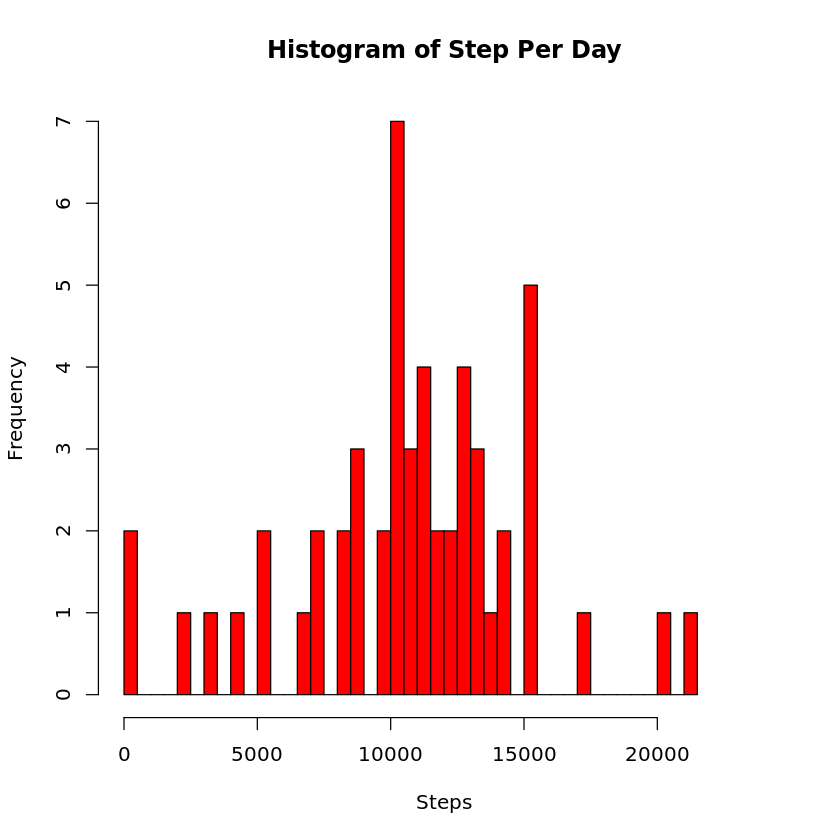

In [6]:
hist(SPD$"Steps",col="red",xlab="Steps",main="Histogram of Step Per Day",breaks = 61,xlim =c(0,24000))

#### 3. Calculate and report the mean and median of the total number of steps taken per day

In [7]:

mean_activity <- mean(SPD$Steps, na.rm=TRUE)
median_activity <- median(SPD$Steps, na.rm=TRUE)

mean_activity
median_activity


[1] 10766.19

[1] 10765

# What is the average daily activity pattern?

#### 1. Make a time series plot (i.e.) of the 5-minute interval (x-axis) and the average number of steps taken, averaged across all days (y-axis)

In [8]:
SPT <- aggregate(steps~interval,data= my_data,FUN=mean, na.action=na.omit)
SPT$time <- SPT$interval/100

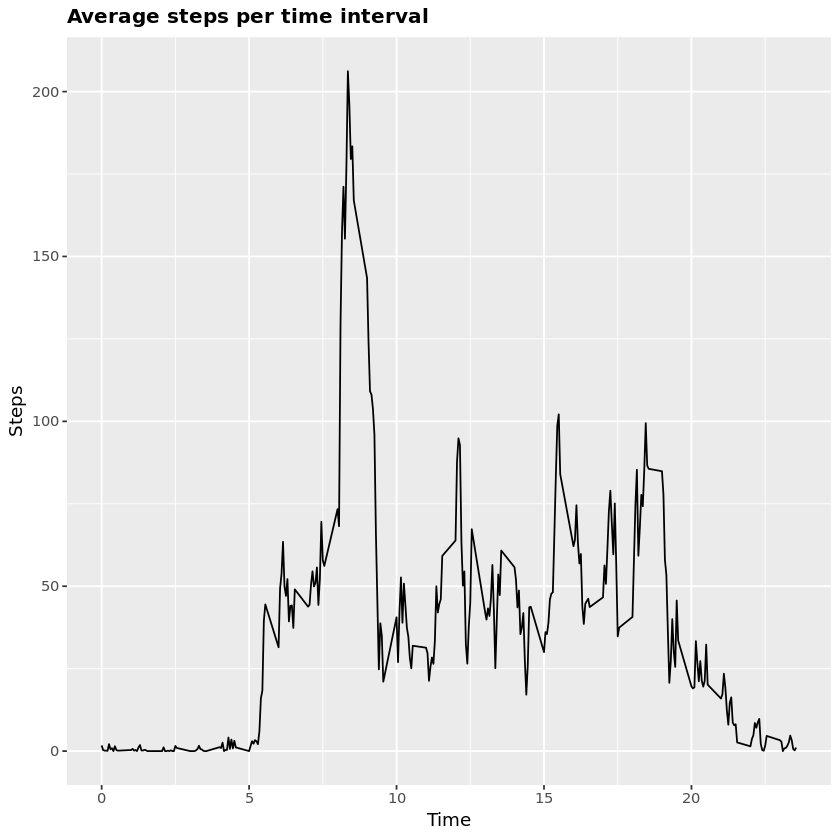

In [9]:
h <- ggplot(SPT, aes(time, steps))
h+geom_line(col="black")+ggtitle("Average steps per time interval")+xlab("Time")+ylab("Steps")+theme(plot.title = element_text(face="bold", size=12))

#### 2. Which 5-minute interval, on average across all the days in the dataset, contains the maximum number of steps?

In [10]:
ST <- tbl_df(SPT)
ST %>% select(time, steps) %>% filter(steps==max(ST$steps))

time,steps
<dbl>,<dbl>
8.35,206.1698


# Imputing missing values

In [11]:
#### 1. Calculate and report the total number of missing values in the dataset (i.e. the total number of rows with NA


In [12]:
ACT <- tbl_df(my_data)
# find the column
ACT %>% filter(is.na(steps)) %>% summarize(missing_values = n())

missing_values
<int>
2304


#### 2. Devise a strategy for filling in all of the missing values in the dataset. The strategy does not need to be sophisticated. For example, you could use the mean/median for that day, or the mean for that 5-minute interval, etc.
#### 3. Create a new dataset that is equal to the original dataset but with the missing data filled in.

In [13]:
my_data$CompleteSteps <- ifelse(is.na(my_data$steps), round(SPT$steps[match(my_data$interval, SPT$interval)],0), my_data$steps)

In [14]:
activityFull <- data.frame(steps=my_data$CompleteSteps, interval=my_data$interval, date=my_data$date)
# see first 10 values of the new dataset
head(activityFull, n=10)

,steps,interval,date
,<dbl>,<int>,<fct>
1,2,0,2012-10-01
2,0,5,2012-10-01
3,0,10,2012-10-01
4,0,15,2012-10-01
5,0,20,2012-10-01
6,2,25,2012-10-01
7,1,30,2012-10-01
8,1,35,2012-10-01
9,0,40,2012-10-01


#### 4. Make a histogram of the total number of steps taken each day

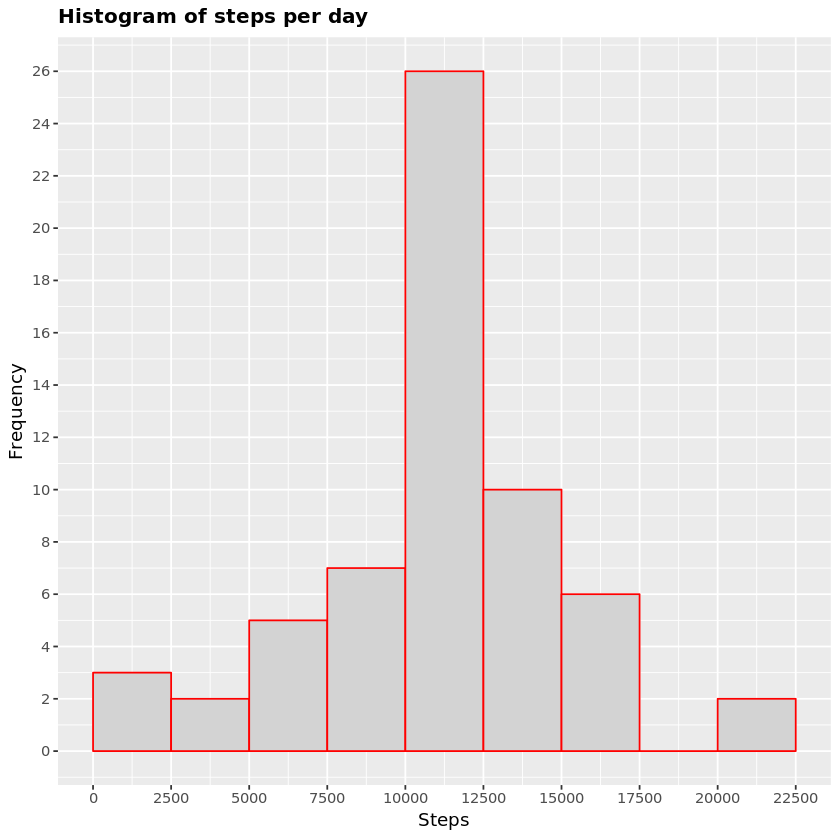

In [15]:
StepsPerDayFull <- aggregate(activityFull$steps, list(activityFull$date), FUN=sum)
colnames(StepsPerDayFull) <- c("Date", "Steps")
# draw the histogram
g <- ggplot(StepsPerDayFull, aes(Steps))
g+geom_histogram(boundary=0, binwidth=2500, col="red", fill="lightgrey")+ggtitle("Histogram of steps per day")+xlab("Steps")+ylab("Frequency")+theme(plot.title = element_text(face="bold", size=12))+scale_x_continuous(breaks=seq(0,25000,2500))+scale_y_continuous(breaks=seq(0,26,2))

#### Calculate and report the mean and median total number of steps taken per day. Do these values differ from the estimates from the first part of the assignment? What is the impact of imputing missing data on the estimates of the total daily number of steps?
#### 

In [16]:
mean(StepsPerDayFull$Steps)
median(StepsPerDayFull$Steps)

[1] 10765.64

[1] 10762

# Are there differences in activity patterns between weekdays and weekends?
#### 1. Create a new factor variable in the dataset with two levels – “weekday” and “weekend” indicating whether a given date is a weekday or weekend day.

In [17]:
activityFull$RealDate <- as.Date(activityFull$date, format = "%Y-%m-%d")
# create a variable with weekdays name
activityFull$weekday <- weekdays(activityFull$RealDate)
# create a new variable indicating weekday or weekend
activityFull$DayType <- ifelse(activityFull$weekday=='Saturday' | activityFull$weekday=='Sunday', 'weekend','weekday')
# see first 10 values
head(activityFull, n=10)

,steps,interval,date,RealDate,weekday,DayType
,<dbl>,<int>,<fct>,<date>,<chr>,<chr>
1,2,0,2012-10-01,2012-10-01,Monday,weekday
2,0,5,2012-10-01,2012-10-01,Monday,weekday
3,0,10,2012-10-01,2012-10-01,Monday,weekday
4,0,15,2012-10-01,2012-10-01,Monday,weekday
5,0,20,2012-10-01,2012-10-01,Monday,weekday
6,2,25,2012-10-01,2012-10-01,Monday,weekday
7,1,30,2012-10-01,2012-10-01,Monday,weekday
8,1,35,2012-10-01,2012-10-01,Monday,weekday
9,0,40,2012-10-01,2012-10-01,Monday,weekday


#### 2. Make a panel plot containing a time series plot (i.e. type = "l") of the 5-minute interval (x-axis) and the average number of steps taken, averaged across all weekday days or weekend days (y-axis).

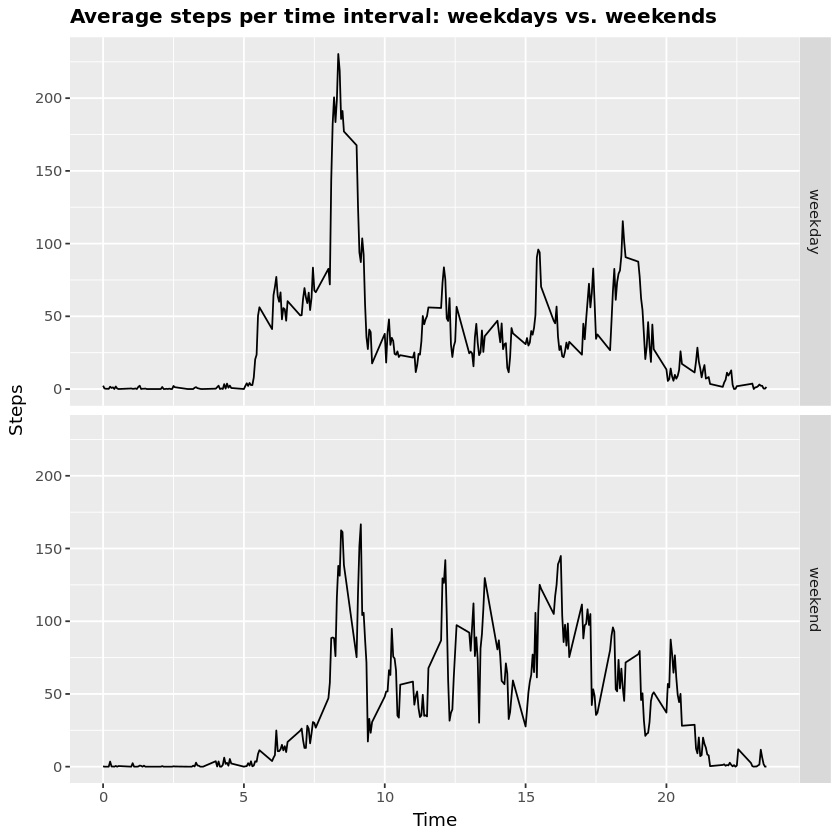

In [18]:
StepsPerTimeDT <- aggregate(steps~interval+DayType,data=activityFull,FUN=mean,na.action=na.omit)
# variable time (more comprensible for the graph axis)
StepsPerTimeDT$time <- SPT$interval/100
# draw the line plot
j <- ggplot(StepsPerTimeDT, aes(time, steps))
j+geom_line(col="black")+ggtitle("Average steps per time interval: weekdays vs. weekends")+xlab("Time")+ylab("Steps")+theme(plot.title = element_text(face="bold", size=12))+facet_grid(DayType ~ .)